## **GOLDEN PROJECT - RECOMMENDATION SYSTEM FOR RETAIL STORES(CODECLAUSE)**

###**BY URNISHA SARKAR**

## **Recommendation System For Retail Stores**

###**Introduction**

The Recommendation System for Retail Stores Documentation serves as a comprehensive guide to understanding and implementing an advanced recommendation system tailored to retail environments. This document outlines the key principles, algorithms, and best practices to enhance customer experiences, increase sales, and optimize product recommendations in retail settings.

###**Scope**


The scope of this documentation encompasses the design, development, and deployment of recommendation systems in various retail contexts. It covers data collection, algorithm selection, user personalization, evaluation metrics, and integration strategies, offering insights for both novice and experienced practitioners in the retail industry.

###**Audience**

This documentation is intended for data scientists, software developers, and retail professionals seeking to implement or improve recommendation systems to enhance customer engagement and sales performance in retail stores.

###**Problem Statement**

In the retail industry, there is a pressing need to enhance customer engagement and boost sales through effective recommendation systems. This documentation addresses the challenge of creating and optimizing such systems to meet these objectives.

###**Objectives**


The primary objective of this documentation is to provide guidance and insights on developing and implementing recommendation systems in retail, ultimately improving customer satisfaction and increasing sales.

**Importing important libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
import random

import warnings
warnings.simplefilter("ignore")

**Loading and Reading the Dataset**

In [2]:
from google.colab import files
data=files.upload()

Saving online_retail.csv to online_retail.csv


In [3]:
df = pd.read_csv("online_retail.csv")

In [4]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Exploring Dataset Information:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.shape

(541909, 8)

In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
null_counts = df.isnull().sum()
print("Null value counts in the dataset:")
print(null_counts)


Null value counts in the dataset:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [12]:
df = df[df['CustomerID'].notnull()]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


**Optimizing Data for Enhanced Clustering**

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
df['InvoiceDay'] = df['InvoiceDate'].apply(lambda x: pd.Timestamp(x.year, x.month, x.day))

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [17]:
dt.timedelta(1)

datetime.timedelta(days=1)

In [18]:
pin_date = max(df['InvoiceDay']) + dt.timedelta(1)
pin_date

Timestamp('2011-12-10 00:00:00')

In [19]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


Creating RFM Variables for Customer Analysis and Marketing Strategies:

In [20]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDay': lambda x: (pin_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})
rfm

,InvoiceDay,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [21]:
rfm.rename(columns= {
    'InvoiceDay': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


**Data Preprocessing and Data Visualisation**

In [22]:
r_labels = range(4, 0, -1) #[4, 3, 2, 1]
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5) # [1, 2, 3, 4]
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [23]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [24]:
df = df.loc[df['Quantity'] > 0]

In [25]:
df['CustomerID'].isna().sum()
df = df.dropna(subset=['CustomerID'])

In [26]:
corr=df.corr()
corr

,Quantity,UnitPrice,CustomerID,TotalSum
Quantity,1.000000,-0.004561,-0.006411,0.908812
UnitPrice,-0.004561,1.000000,-0.010863,0.081646
CustomerID,-0.006411,-0.010863,1.000000,-0.004104
TotalSum,0.908812,0.081646,-0.004104,1.000000


**Heat Map**

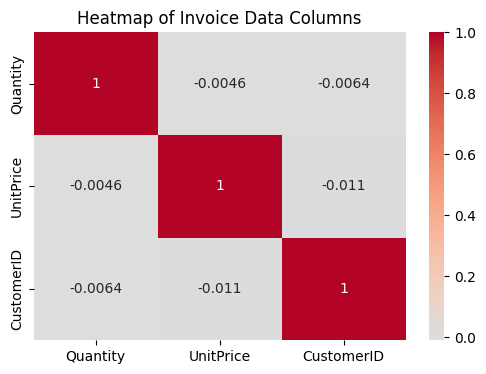

In [27]:
columns_for_heatmap = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
heatmap_data = df[columns_for_heatmap]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Invoice Data Columns')
plt.show()


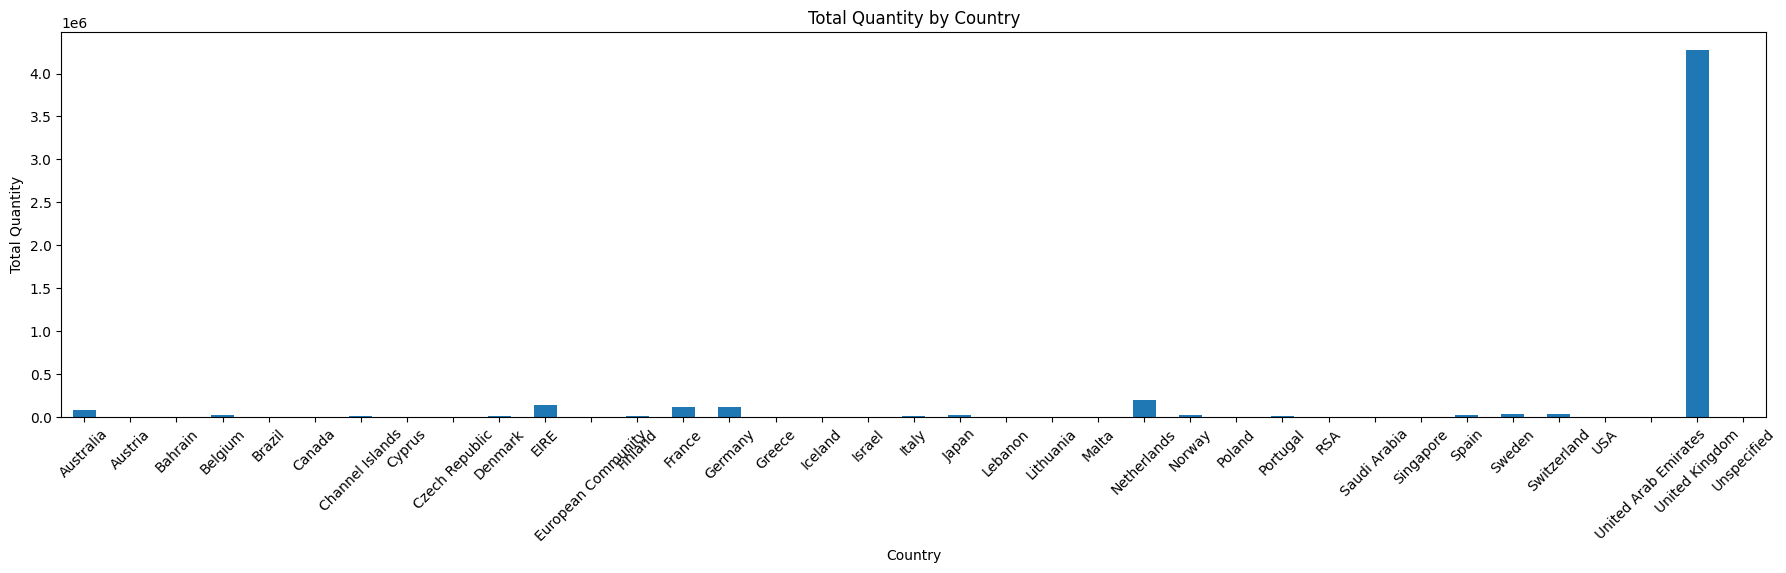

In [28]:
country_quantity = df.groupby("Country")["Quantity"].sum()

plt.figure(figsize=(22, 5))
country_quantity.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Country")
plt.xticks(rotation=45)
plt.show()

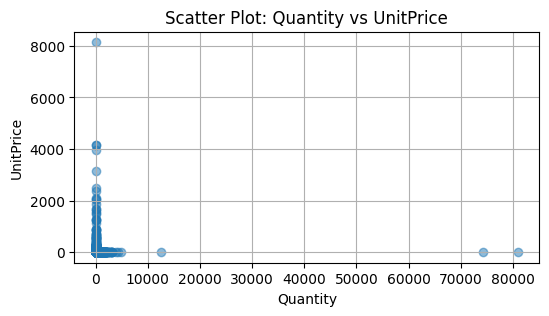

In [29]:
x_column = "Quantity"
y_column = "UnitPrice"

plt.figure(figsize=(6, 3))

plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"Scatter Plot: {x_column} vs {y_column}")
plt.grid(True)

plt.show()

**K-Means Clustering**

In [30]:
X = rfm[['R', 'F', 'M']]
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=10)

In [31]:
kmeans.labels_

array([3, 2, 8, ..., 6, 2, 9], dtype=int32)

In [32]:
rfm['kmeans_cluster'] = kmeans.labels_

In [33]:
rfm

,Recency,Frequency,Monetary,R,F,M,kmeans_cluster
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,3
12347.0,3,182,4310.00,4,4,4,2
12348.0,76,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,9
12350.0,311,17,334.40,1,1,2,3
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,13,176.60,4,1,1,6


In [34]:
rfm[rfm['kmeans_cluster'] == 0]

,Recency,Frequency,Monetary,R,F,M,kmeans_cluster
CustomerID,,,,,,,
12358.0,2,19,1168.06,4,2,3,0
12374.0,26,33,742.93,3,2,3,0
12375.0,3,18,455.42,4,2,2,0
12384.0,29,30,566.16,3,2,2,0
12427.0,12,35,708.37,4,2,3,0
...,...,...,...,...,...,...,...
18211.0,26,42,600.07,3,2,2,0
18216.0,32,26,481.75,3,2,2,0
18217.0,30,31,621.75,3,2,2,0


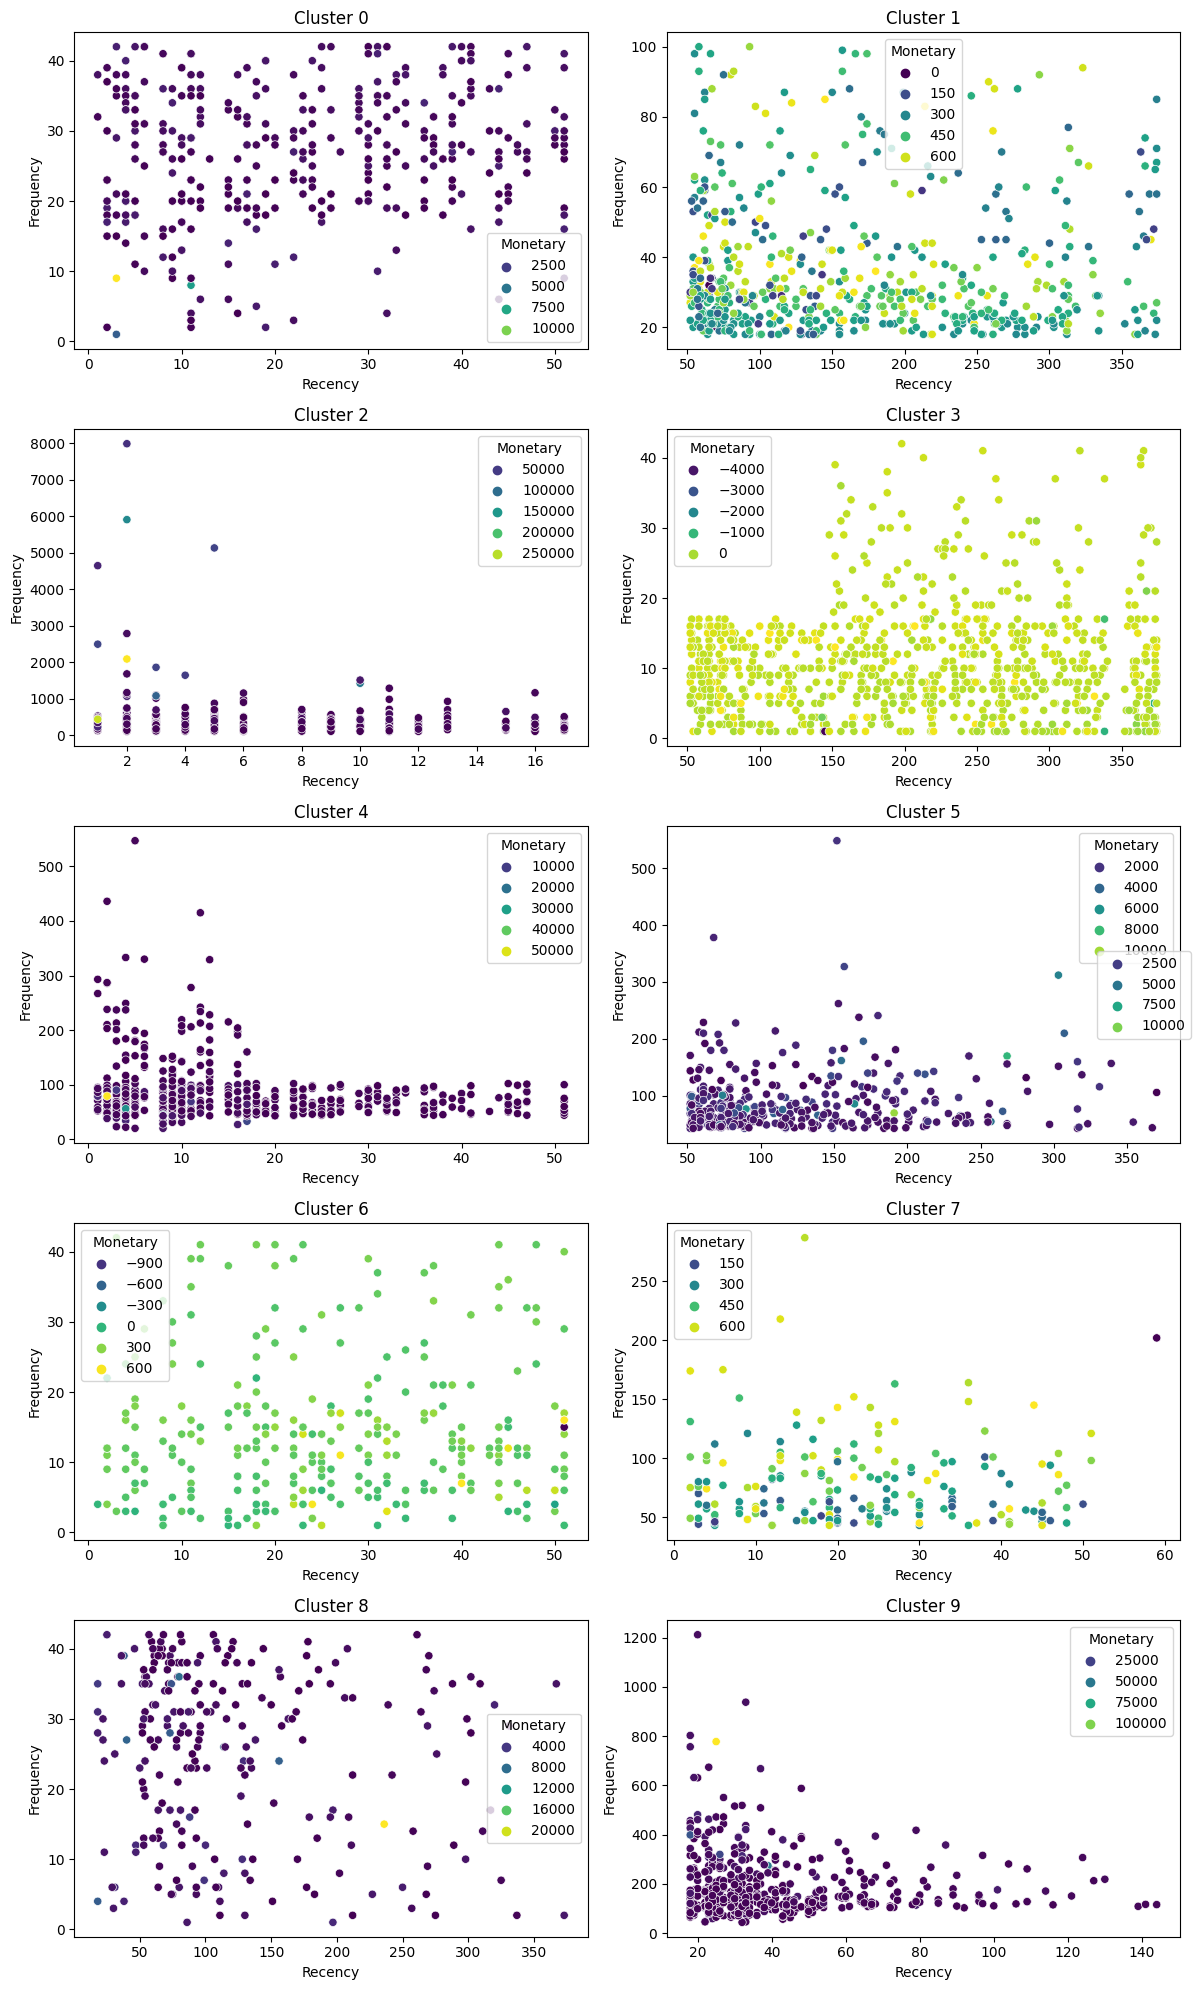

In [35]:
num_clusters = 10

fig, axes = plt.subplots(num_clusters // 2, 2, figsize=(12, 20))

axes = axes.ravel()

for cluster_id in range(num_clusters):
    cluster_data = rfm[rfm['kmeans_cluster'] == cluster_id]
    sns.scatterplot(data=cluster_data, x='Recency', y='Frequency', hue='Monetary', palette='viridis', ax=axes[cluster_id])
    axes[cluster_id].set_title(f'Cluster {cluster_id}')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

plt.tight_layout()

plt.show()

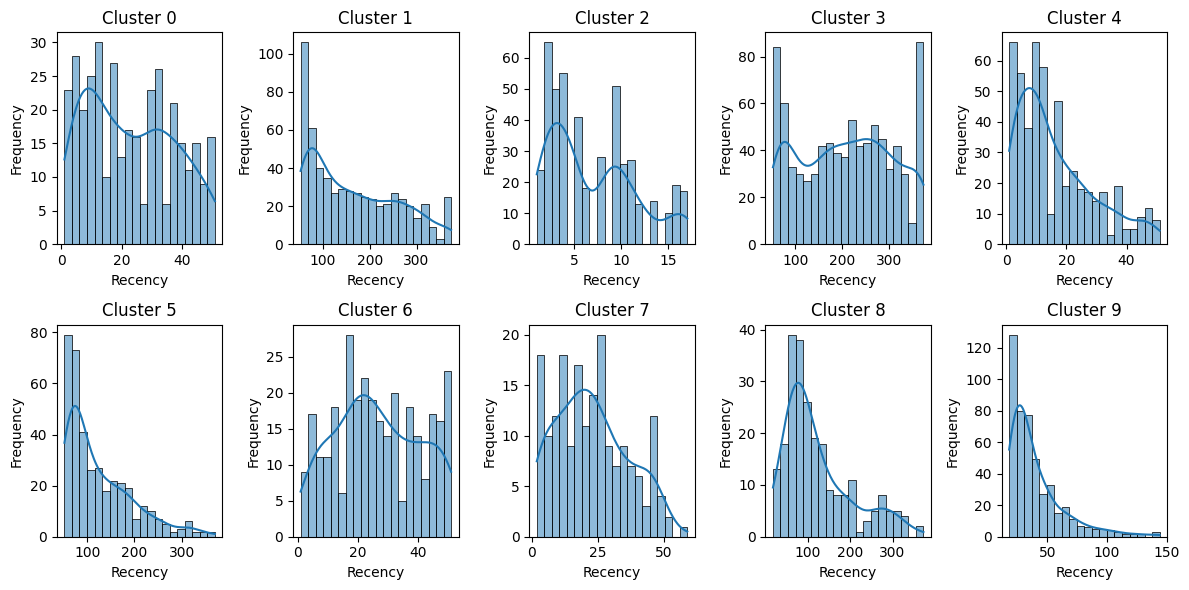

In [36]:
plt.figure(figsize=(12, 6))
for cluster_id in range(num_clusters):
    plt.subplot(2, 5, cluster_id + 1)
    sns.histplot(rfm[rfm['kmeans_cluster'] == cluster_id]['Recency'], bins=20, kde=True)
    plt.title(f'Cluster {cluster_id}')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [37]:
num_clusters = 10

cluster_recommendations = {}

for cluster_id in range(num_clusters):
    customers_in_cluster = rfm[rfm['kmeans_cluster'] == cluster_id].index
    top_products_for_cluster = df[df['CustomerID'].isin(customers_in_cluster)].groupby(['StockCode'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

    cluster_recommendations[f'Cluster {cluster_id}'] = top_products_for_cluster.index.tolist()
for cluster, recommended_products in cluster_recommendations.items():
    print(f"{cluster} -> Recommended Products: {recommended_products}")

Cluster 0 -> Recommended Products: ['84879', 'POST', '22086', '22138', '85123A', '22423', '23084', '23355', '21790', '22457']
Cluster 1 -> Recommended Products: ['85123A', '22423', '47566', '21034', '22470', '84879', '22720', '22960', '22469', 'POST']
Cluster 2 -> Recommended Products: ['85099B', '85123A', '20725', '22423', '47566', '20727', '22197', '23203', '22383', '23209']
Cluster 3 -> Recommended Products: ['85123A', '22423', '47566', '21034', '84879', '84946', '22457', '22138', '22178', 'POST']
Cluster 4 -> Recommended Products: ['85123A', '22423', '23084', 'POST', '22086', '22469', '84879', '21034', '23355', '47566']
Cluster 5 -> Recommended Products: ['85123A', '22423', '84879', '47566', '22720', '21212', '85099B', '22960', '22457', '20725']
Cluster 6 -> Recommended Products: ['21034', '23084', '23355', '84879', '22577', '84946', '22138', '22578', '85099B', 'POST']
Cluster 7 -> Recommended Products: ['21034', '22086', '23084', '85123A', '22197', '23321', '23301', '22469', '2257

In [38]:
def generate_cluster_recommendations(num_clusters, num_customers_to_display, rfm, df):
    cluster_recommendations = {}

    for cluster_id in range(num_clusters):
        customers_in_cluster = rfm[rfm['kmeans_cluster'] == cluster_id].index
        top_products_for_cluster = df[df['CustomerID'].isin(customers_in_cluster)].groupby(['StockCode'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

        non_buyers = [customer for customer in customers_in_cluster if not (df[(df['CustomerID'] == customer) & (df['StockCode'].isin(top_products_for_cluster.index.tolist()))]).empty]

        num_customers_to_display = min(num_customers_to_display, len(non_buyers))

        selected_customers = non_buyers[:num_customers_to_display]

        cluster_recommendations[f'Cluster {cluster_id}'] = {
            'Recommended Products': top_products_for_cluster.index.tolist(),
            'Selected Non-Buyer Customers': selected_customers
        }

    return cluster_recommendations

# Example usage:
num_clusters = 10
num_customers_to_display = 5

cluster_recommendations = generate_cluster_recommendations(num_clusters, num_customers_to_display, rfm, df)

for cluster, recommendations_and_customers in cluster_recommendations.items():
    print(f"{cluster} ->")
    print("Recommended Products:")
    for customer_id in recommendations_and_customers['Selected Non-Buyer Customers']:
        print(f"Customer: {customer_id} =====>>>> Recommended Products: {recommendations_and_customers['Recommended Products']}")
    print()

Cluster 0 ->
Recommended Products:
Customer: 12358.0 =====>>>> Recommended Products: ['84879', 'POST', '22086', '22138', '85123A', '22423', '23084', '23355', '21790', '22457']
Customer: 12374.0 =====>>>> Recommended Products: ['84879', 'POST', '22086', '22138', '85123A', '22423', '23084', '23355', '21790', '22457']
Customer: 12375.0 =====>>>> Recommended Products: ['84879', 'POST', '22086', '22138', '85123A', '22423', '23084', '23355', '21790', '22457']
Customer: 12384.0 =====>>>> Recommended Products: ['84879', 'POST', '22086', '22138', '85123A', '22423', '23084', '23355', '21790', '22457']
Customer: 12427.0 =====>>>> Recommended Products: ['84879', 'POST', '22086', '22138', '85123A', '22423', '23084', '23355', '21790', '22457']

Cluster 1 ->
Recommended Products:
Customer: 12365.0 =====>>>> Recommended Products: ['85123A', '22423', '47566', '21034', '22470', '84879', '22720', '22960', '22469', 'POST']
Customer: 12390.0 =====>>>> Recommended Products: ['85123A', '22423', '47566', '210

**Creating the customer-item matrix**

In [39]:
customer_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix.loc[12481:].head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
12483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
12484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
12488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [40]:
customer_item_matrix.fillna(0, inplace=True)
customer_item_matrix.iloc[:5,:3665]

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
print(customer_item_matrix.shape)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

(4339, 3665)


**Collaborative Filtering**

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

**User based collaborative filtering**

In [43]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [44]:
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()


CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [45]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False).head(10)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
12791.0    0.171499
16754.0    0.171499
12814.0    0.171499
16426.0    0.166968
16333.0    0.161690
Name: 12350.0, dtype: float64

**Making Recommendations**

In [46]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)
items_bought_by_A = customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]>0]
print("Items Bought by A: ")
print(items_bought_by_A)

Items Bought by A: 
StockCode
20615     1
20652     1
21171     1
21832     1
21864     1
21866     1
21908     1
21915     1
22348     1
22412     1
22551     1
22557     1
22620     1
79066K    1
79191C    1
84086C    1
POST      1
Name: 12350.0, dtype: int64


In [47]:
items_bought_by_B = customer_item_matrix.loc[17935.0][customer_item_matrix.loc[17935.0]>0]
print("Items bought by B:")
print(items_bought_by_B)

print()

items_to_recommend_to_B = set(items_bought_by_A.index) - set(items_bought_by_B.index)
print("Items to Recommend to B ")
print(items_to_recommend_to_B)
df.loc[df['StockCode'].isin(items_to_recommend_to_B),['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

Items bought by B:
StockCode
20657     1
20659     1
20828     1
20856     1
21051     1
21866     1
21867     1
22208     1
22209     1
22210     1
22211     1
22449     1
22450     1
22551     1
22553     1
22557     1
22640     1
22659     1
22749     1
22752     1
22753     1
22754     1
22755     1
23290     1
23292     1
23309     1
85099B    1
POST      1
Name: 17935.0, dtype: int64

Items to Recommend to B 
{'22620', '21832', '20615', '21171', '21908', '21864', '79066K', '22412', '79191C', '21915', '84086C', '22348', '20652'}


,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


**Item-based collaborative filtering**

In [48]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

In [49]:
print(item_item_sim_matrix)

StockCode     10002     10080     10120    10123C  10124A    10124G     10125  \
StockCode                                                                       
10002      1.000000  0.000000  0.094868  0.091287     0.0  0.000000  0.090351   
10080      0.000000  1.000000  0.000000  0.000000     0.0  0.000000  0.032774   
10120      0.094868  0.000000  1.000000  0.115470     0.0  0.000000  0.057143   
10123C     0.091287  0.000000  0.115470  1.000000     0.0  0.000000  0.164957   
10124A     0.000000  0.000000  0.000000  0.000000     1.0  0.447214  0.063888   
...             ...       ...       ...       ...     ...       ...       ...   
C2         0.029361  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
DOT        0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
M          0.066915  0.016182  0.070535  0.000000     0.0  0.000000  0.070535   
PADS       0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
POST       0.078217  0.00000

**Making Recommendations**

In [50]:
available_indices = item_item_sim_matrix.index
print(available_indices)

Index(['10002', '10080', '10120', '10123C', '10124A', '10124G', '10125',
       '10133', '10135', '11001',
       ...
       '90214V', '90214W', '90214Y', '90214Z', 'BANK CHARGES', 'C2', 'DOT',
       'M', 'PADS', 'POST'],
      dtype='object', name='StockCode', length=3665)


In [51]:
top_10_similar_items = list(item_item_sim_matrix.loc['10002'].sort_values(ascending=False).iloc[:10].index)

print(top_10_similar_items)
print()

filtered_df = df[df['StockCode'].isin(top_10_similar_items)]

filtered_df = filtered_df[['StockCode', 'Description']].drop_duplicates()

filtered_df = filtered_df.set_index('StockCode')

result = filtered_df.loc[top_10_similar_items]

print(result)


['10002', '90103', '21826', '16010', '90059B', '90059C', '90059E', '90059F', '90101', '84535A']

                                   Description
StockCode                                     
10002              INFLATABLE POLITICAL GLOBE 
90103               PURPLE FRANGIPANI NECKLACE
21826                 EIGHT PIECE DINOSAUR SET
16010       FOLDING CAMPING SCISSOR W/KNIF & S
90059B     DIAMANTE HAIR GRIP PACK/2 BLACK DIA
90059C       DIAMANTE HAIR GRIP PACK/2 MONTANA
90059E          DIAMANTE HAIR GRIP PACK/2 RUBY
90059F       DIAMANTE HAIR GRIP PACK/2 LT ROSE
90101                WHITE FRANGIPANI NECKLACE
84535A           ENGLISH ROSE NOTEBOOK A6 SIZE


##**THANK YOU**